### Querying your data
Most large astronomy projects use databases to manage their data. In this module we introduce SQL - the language most commonly used to query databases. We use SQL to query the NASA Exoplanet database and investigate the habitability of planets in other solar systems.
7 videos
<ol>
<li>Video: Organising your data</li>
<li>Discussion Prompt: Do you use databases in your work?</li>
<li>Video: Exoplanets</li>
<li>Video: Querying database with SQL</li>
<li>Video: More advanced SQL</li>
<li>Video: Joining tables in SQL</li>
<li>LTI Item: Joining tables with SQL</li>
<li>Video: Module summary</li>
<li>Video: Interview with Jon Jenkins</li>
</ol>

<pre>
Graded: Exoplanets - test your understanding
Graded: Writing your own SQL queries
</pre>

In these activities we'll introduce you to databases and how to work with them. We start off with simple queries and work our way towards more advanced techniques to equip you with the skills required to use standard astronomical databases. 
The theme of these activities is exoplanets – planets that orbit stars different from our sun. Thousands of exoplanets have now been discovered and categorised using lots of criteria. A natural way to organise and access this data is to use a database. In these examples, we will use subsets of NASA's exoplanet archive. 

### What is a database
A database is an organised collection of (usually structured) data.

We have created a database with two tables, Star and Planet, which store information about stars and their exoplanets, sampled from the <a href="http://exoplanetarchive.ipac.caltech.edu/" target="_blank">NASA exoplanet archive</a>.

The following schematic visualises the organisation in these tables. They each have a set of attributes that identify and characterise the astronomical object. 

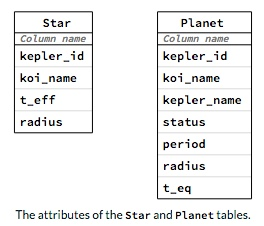

For reference, we've listed the physical descriptions of all the attributes above so that later on you can come back to this slide if you're unsure what they mean. 

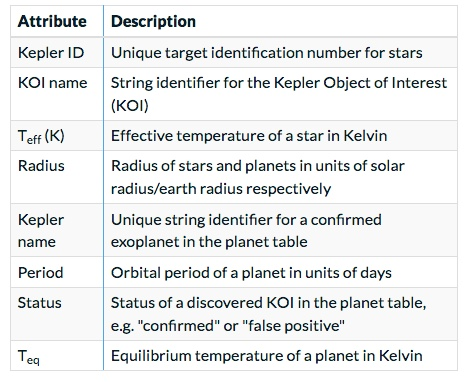


### Database and SQL
SQL (Structured Query Language) is the most widely used database query language. SQL is designed especially for data management in relational databases. In this course, we'll use the <a href="https://www.postgresql.org/">PostgreSQL</a> implementation of SQL.

Let's use SQL to query the database from the previous slide. Every query takes one or more tables as arguments and returns a new table with the requested data. A simple example is shown below:

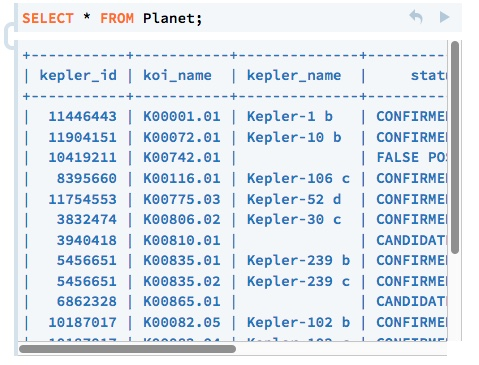

This query returns all the entries in the Planet table. The <b>SELECT</b> keyword starts the query. The next part of the statement defines the attributes to be returned, here a * means all attributes are to be included. Lastly, the <b>FROM</b> clause specifies which table(s) to query. Every SQL statement ends with a semicolon.

Replace Planet above with Star to look at the other table.

#### Cases in SQL
SQL keywords are case insensitive, i.e. Select or select have the same effect than the capitalised version.

However, comparisons are not necessarily case insensitive.

### SQL queries
In the previous example, we requested everything from the Planet table. Now let's try extracting specific information.

#### 1. Specifying the attributes (or columns)

Rather than retrieving all (\*) attributes from a table, we can select specific columns right after the <b>SELECT</b> keyword:

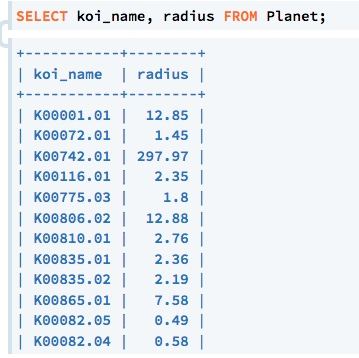

This query returns only the KOI names and the radii of the planets in our Planet table.

#### 2. Formulating conditions

SQL queries are typically conditional – you only request data which meets certain conditions. In simple cases, we can make a conditional query using the WHERE clause with comparisons like:

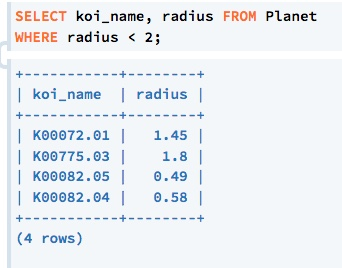

The < operator returns a true or false (Boolean) for each planet radius. This query returns all the planets which have a radius smaller than two (measured in earth radii). 

### Task: Large stars
Write an SQL query to find the radius and temperature of the stars in the Star table that are larger than our sun.

The output of your query should look like this:
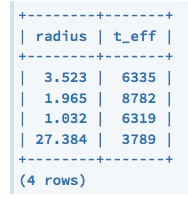

### Sample solution
This problem asks you to use the two SQL elements which were introduced on the last slide. With these on hand, we can write down the solution as follows:

<pre>
SELECT radius, t_eff 
FROM Star
WHERE radius > 1;
</pre>
(1 point)

### Conditional queries
As you've seen on the previous slides, we can use comparison operators like < and > for conditional queries. In general, SQL includes a standard set of Boolean operators, e.g. AND or NOT.

To experiment with the different operators, we can use them directly in the SELECT statement like this:

<pre>
SELECT 2 > 3;
SELECT NOT 2 > 3;
SELECT 2 = 3;
</pre>

The output of every query, regardless of whether a table is queried or not, is a table. The t and f here stand for true and false.

The numerical comparison operators also work on strings, which are declared using single quotation marks:

<pre>
SELECT 'abc' < 'abcd';
SELECT 'abc' = 'ABC';
</pre>

Note that while SQL syntax is case insensitive, strings are not. If you're unsure what capitalisation is used in an attribute, you can use the UPPER or LOWER function to convert the attribute and then perform the comparison:

<pre>
SELECT UPPER('aBc') = 'ABC';
SELECT LOWER('aBc') = 'abc';
</pre>

### Combining condtions
We can also combine conditions in a <b>WHERE</b> clause using for example the logical and:

<pre>
SELECT 0 < 1 AND 1 < 2;
</pre>

This allows us to, for example, perform range queries over a set of data. Suppose we want to find all the stars in our Star table whose radius lies between one and two earth radii, we could write:

<pre>
SELECT radius FROM Star
WHERE radius >= 1 AND radius <= 2;
</pre>

Since range queries are quite common, SQL provides its own syntax for these queries using the BETWEEN statement. With this, we can rewrite the query from above in a more readable form as:

<pre>
SELECT radius FROM  Star
WHERE radius BETWEEN 1 AND 2;
</pre>

<b>BETWEEN</b> comparisons are inclusive on both end points, so the two queries above are equivalent. 

### Task: A range of hot stars
Your task is to write a range query which returns the kepler_id and the t_eff attributes of all those stars in the Star table whose temperature lies between 5000 and 6000 Kelvin (inclusive).

Your results on the example table should look like this: 
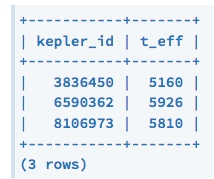|

#### Sample solution
This problem is a slight step-up from the last one by asking you to perform a range query. As you've seen on the last slide, there are two standard ways of doing that: You can either use the comparison operators (< and >) in combination with AND, or you can use the BETWEEN statement. Using the latter, we can write the requested query as follows:

<pre>
SELECT kepler_id, t_eff
FROM Star
WHERE t_eff BETWEEN 5000 and 6000;
</pre>
(1 point)

### Looking at a database's structure
To query a table, we need to know what columns it contains. If we haven't got any information about the table, we can use the \d statement to get a description of the table's columns: 

<pre>
\d planet;
</pre>


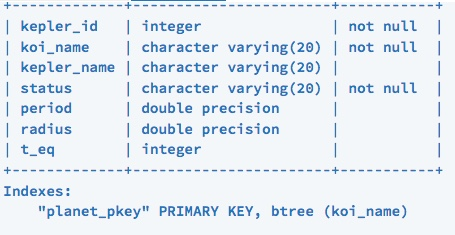

 \d returns a description each column: its name, data type and optional modifiers. The data types above are mostly types that we've seen before. The type character varying(20) indicates that this column can hold up to 20 characters. We will have a closer look at these types in later activities.

Some columns have a not null modifier. This means that when adding data to this table, these attributes must be specified. Other attributes can be left blank. The concept of a NULL value in SQL is quite important, so we will have a closer look at that. 

### NULL values in SQL
In our Planet table, not all exoplanets have a Kepler name because they aren't all confirmed planets. In SQL, missing values are represented by NULL values, which are equivalent to an empty field.

A NULL is not equivalent to an empty string:
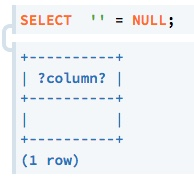

What's this? The query returns an empty field, or, to be precise, it returns a NULL value.

This is a peculiarity of SQL databases – comparison operators cannot return true or false here since the NULL value is unknown. If we want to find out whether an attribute is actually a NULL value, we have to use the IS comparison:
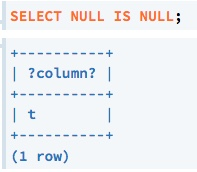

With this, you can also check that the first query with the = operator actually returns a NULL value:
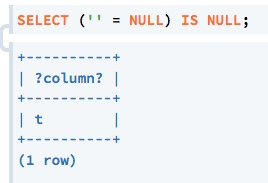

### Task: confirmed exoplanets
In this question you should write a query to find the kepler_name and radius of each planet in the Planet table which is a confirmed exoplanet, meaning that their kepler_name is not NULL, or, equivalently, whose status is 'CONFIRMED'.

Restrict your results to those planets whose radius lies between one and three earth radii, and remember that the radius of the planets is relative to the earth radius.

Your query should produce a table like this: 
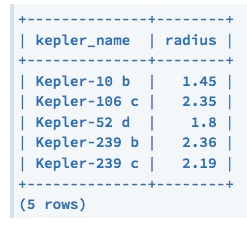

#### Sample solution
The easiest way to solve this problem is to combine all conditions using the AND operator in the WHERE statement: 

<pre>
SELECT kepler_name, radius 
FROM Planet
WHERE
  radius BETWEEN 1 AND 3 AND
  kepler_name IS NOT NULL;
</pre>

#### Alternative solutions:
My solution:
<pre>
SELECT kepler_name, radius
FROM Planet
WHERE (radius BETWEEN 1 and 3) AND (status = 'CONFIRMED');
</pre>

<pre>
SELECT kepler_name, radius 
FROM Planet
WHERE
  radius BETWEEN 1 AND 3 AND
  status = 'CONFIRMED';
</pre>


### Counting table entries
As databases increase in size, printing out a full table of all the requested data might not be instructive anymore or even feasible. In these cases, we can in principle make the query more specific to limit the results, but if we don't know a priori what results to expect, we need a better way of characterising the size and statistics of the data and to limit the overall results.

As opposed to returning the requested data in table format, we can use the COUNT function to only return the number of rows in the table we requested. To count, for example, all planets in the Planet table, we can use it like this:

<pre>SELECT COUNT(*) FROM Planet;</pre>

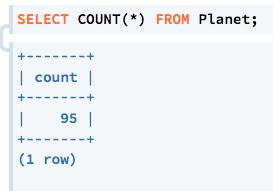

From here on, we're going to use larger tables; have a look at how many stars and planets there are now.

We can combine counting with all of the other SQL statements that we have seen before. It effectively replaces the attributes that you request right after the SELECT statement. Counting only the confirmed planets would for example work like this:

<pre>
SELECT COUNT(*) FROM Planet
WHERE kepler_name IS NOT NULL;
</pre>

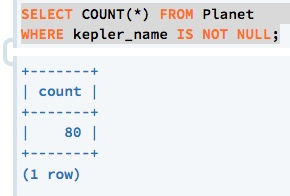



### Data statistics and aggregate functions
The COUNT function that we've seen on the last slide belongs to SQL's aggregate functions. An aggregate function returns a single value which was calculated based on one or more columns.

SQL offers a range of aggregate functions which are very valuable for extracting some statistical information from databases. Knowing what data, or what range of data to expect can help to make a query more specific. A few useful functions are for example: 

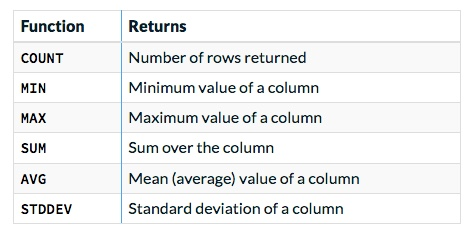

Let's have a look at a few examples:

<pre>
SELECT MIN(radius), MAX(radius), AVG(radius)
FROM Planet;
</pre>

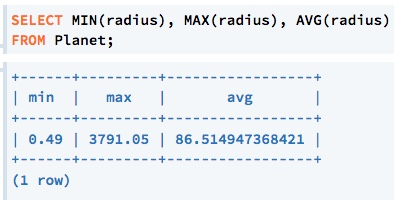

We could also calculate an average ourselves using the division operator / in the SELECT clause and compare it to the built-in AVG:

<pre>
SELECT SUM(t_eff)/COUNT(*), AVG(t_eff)
FROM Star;
</pre>

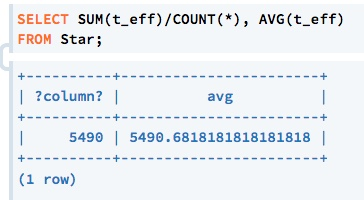

Look at the two results this query returns. Why are they different? The reason here is that the attribute t_eff is an integer and SQL then automatically performs integer division upon the / operator.

#### Integer division
Keep in mind that SQL performs integer division on integers, i.e. only an integer value is returned. For example:

<pre>
SELECT 1/2, 1/2.0;
</pre>

Sometimes this might not be what you want so keep an eye out. 

### Ordering results and limiting output
The rows in a table may not not be sorted in a useful order. In our tables, they appear in the order in which the stars and planets were added to the database.

We can use an ORDER BY clause to change the sort order. To sort the planets by their radius in descending order, we can write:

<pre>
SELECT koi_name, radius FROM Planet 
ORDER BY radius DESC;
</pre>

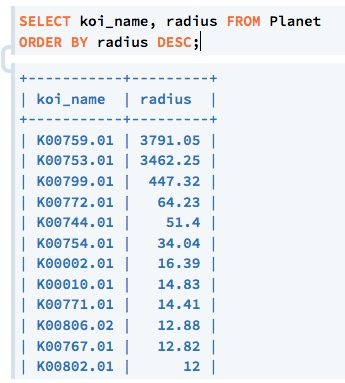

The DESC stands for descending order; for ascending order we use ASC or put nothing.

In addition to sorting, we can restrict the number of rows returned using the LIMIT clause. If we are only interested in the five largest planets we could write:

<pre>
SELECT koi_name, radius FROM Planet 
ORDER BY radius DESC
LIMIT 5;
</pre>

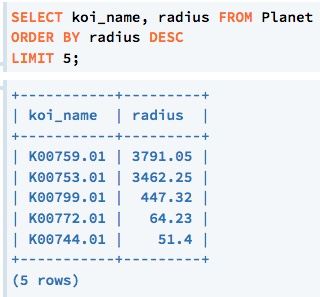

This limits the results to the first five rows (after sorting). The ability to limit results becomes especially valuable in large databases, where the data volume can severely impact performance. 


### Task: Planet statistics
Let's analyse the size of the unconfirmed exoplanets.

Your task is to write a query that calculates the:

    minimum radius;
    maximum radius;
    average radius; and
    standard deviation of the radii

of unconfirmed planets (with a NULL value in kepler_name) in the Planet table. It should look like this on the example data:

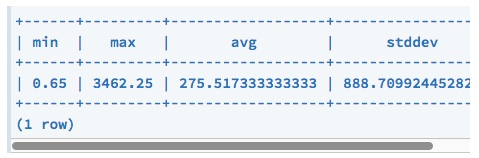

#### Sample solution
My solution:
<pre>
SELECT MIN(radius), MAX(radius), AVG(radius), STDDEV(radius)
FROM Planet
WHERE kepler_name is NULL;
</pre>

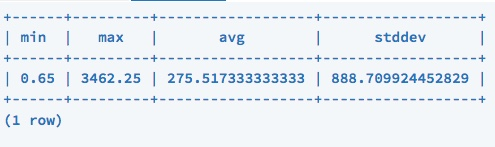

(1 point)

#### Course solution
This question asked for two different queries, which we can just do sequentially (and remember to use semicolons!). Both queries require us to limit the results to unconfirmed planets, which we can do in the WHERE clause either by checking whether they have a kepler_name;

[...] WHERE kepler_name IS NULL

or whether their status is confirmed:

[...] WHERE status = 'Confirmed'

Then for the first query we add an ORDER BY statement to sort the results. For the second query we simply list the aggregate functions that the question is asking for in the SELECT clause.

<pre>
SELECT MIN(radius), MAX(radius),
  AVG(radius), STDDEV(radius)
FROM Planet
WHERE kepler_name IS NULL;
</pre>


### Managing data subsets
What if we want to work with subsets of the table simultaneously?

But first of all, what do we mean by working with different subsets simultaneously? Imagine the following problem: we want to find out if there are multiple planets within the Planet table that have the same size, as measured by their radius. How can we do that? We can write a simple query in which we order the results such that we can see multiple occurences of the same radius:

<pre>
SELECT radius FROM Planet
ORDER BY radius asc;
</pre>

But this is not really useful to look at. Much better would be, if we could count the radii which occur multiple times in the table.

For situations like this, we can use the GROUP BY clause, which arranges identical data in groups on which we can perform aggregate functions, like COUNT. To solve our problem from above, we can query the table like this:

<pre>
SELECT radius, COUNT(koi_name)
FROM Planet 
GROUP BY radius;
</pre>

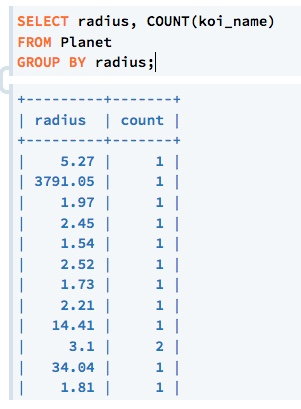

This query returns a table which is grouped by the planet radii, and contains the radii and the number of koi_names belonging to each radius. We decided to count the koi_name attribute since this attribute is unique for each planet.

This solution still produces a somewhat lenghty table, but it's a lot better than our first approach. Let's have a look at how we can refine this. 

### Limiting counting
If we want to restrict the results from the last query to only those where the count is larger than one, we can add a condition for this value. Previously, we've added conditions using the WHERE clause, but if we try the following:

<pre>
SELECT radius, COUNT(koi_name) 
FROM Planet 
WHERE COUNT(koi_name) > 1
GROUP BY radius;
</pre>
Produces an error:
<pre>
psql:query.sql:4: ERROR:  aggregate functions are not allowed in WHERE
LINE 3: WHERE COUNT(koi_name) > 1
</pre>

The query fails because WHERE gets processed before the GROUP BY clause and does therefore not have access to aggregate functions.

In order to use aggregate functions in our conditions, we require the HAVING statement instead of WHERE, which gets called after the GROUP BY clause: 

<pre>
SELECT radius, COUNT(koi_name) 
FROM Planet 
GROUP BY radius
HAVING COUNT(koi_name) > 1;
</pre>

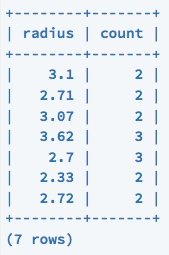

Other attributes can still be used in WHERE conditions, just as we saw before: 

<pre>
SELECT radius, COUNT(koi_name) 
FROM Planet 
WHERE t_eq BETWEEN 500 AND 1000
GROUP BY radius
HAVING COUNT(koi_name) > 1;
</pre>

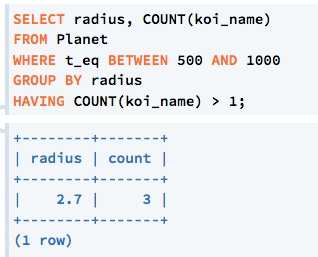



### Task: planets in multi-planet systems 
You need to find out how many planets in the Planet database are in a multi-planet system. Planets sharing the same star will have the same kepler_id, but different koi_name values.

Your query should return a table in which each row contains the kepler_id of the star and the number of planets orbiting that star (i.e. that share this kepler_id).

Limit your results to counts above one and order the rows in descending order based on the number of planets.

The results should look like this: 

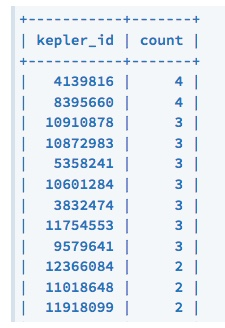

### Solutions

#### Hint
You will need to group the results based on the kepler_id attribute. Have a look at the previous query if you're unsure how to do that.

This problem requires us to use everything that you've seen on the last couple of slides. We use the aggregate function COUNT to count the koi_name, an attribute which is unique to each planet, to get an accurate representation of the number of planets. We group the counts based on the kepler_id attribute to find out how many planets share a Kepler-ID. Instead of a WHERE clause to specify the minimum number of counts to be returned, we use HAVING. Lastly, we order the results according to the count values in descending order using ORDER BY, as we've seen before. 

#### Sample Solution:
<pre>
SELECT kepler_id, COUNT(koi_name) FROM Planet 
GROUP BY kepler_id HAVING COUNT(koi_name) > 1
ORDER BY COUNT(koi_name) DESC;
</pre>

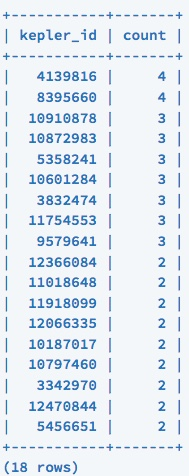
(1 point)


Congratulations, you've finished this set of activities.

If you've still got questions about any of the content, head to the forums to discuss with your fellow learners.